In [1]:
from measurements.waveforms.GaussianCosPulse import *
from measurements.DataChannelManager import * # Contém classe que gerencia os dados para serem carregados no AWG
from measurements.PulseSequence import * # Classe que estratura e sequencia os pulsos

# Diferentes tipos de pulsos que podem ser usados

from measurements.waveforms.SquarePulse import *
from measurements.waveforms.CosinePulse import *
from measurements.waveforms.SquareSideBandPulse import *
from measurements.waveforms.ZeroPulse import *
from measurements.waveforms.GaussianPulse import *
from measurements.waveforms.DragPulse import *
from measurements.waveforms.GaussianBorderCosPulse import *

import matplotlib.pyplot as plt
# Define-se um pulso Zero
#p1 = GaussianBorderCosPulse(length = 1e-6, frequency = 4e9, amplitude = 1,sigma=1e-8,border_lenght=6)
p1 = GaussianCosPulse(length = 1e-6, frequency = 4e9, amplitude = 1,sigma=1e-7,)
#p1 = CosinePulse(length = 1e-6, amplitude = 0.1)
#p1 = SquarePulse(length = 1e-6, amplitude = 1)
#p1 = GaussianPulse(length = 20e-6, amplitude = 1, sigma = 4e-6)
#p2 = ZeroPulse(length = RFMeasurementLength)

s1 = PulseSequence('Twotone', 10e-9)

s1.clear()

s1.add(p = p1, channel = 'I', delay = 0)
#s1.add(p = p2, channel = 'm')

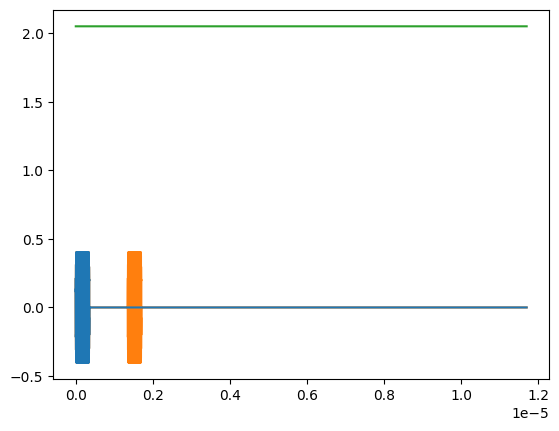

In [11]:
PiPulse=0.7e-6

p1 = GaussianCosPulse(length = PiPulse/2,  amplitude = 0.4,sigma=0.15*PiPulse/2,frequency =4.4565e9 ,)
p1 = GaussianBorderCosPulse(length = PiPulse/2,  amplitude = 0.4,sigma=0.01*PiPulse/2,frequency =4.4565e9 ,)
#p3 = GaussianBorderCosPulse(length = PiPulse/2,  amplitude = 0.4,sigma=0.15*PiPulse/2,frequency =4.4565e9 ,)
#p1 = GaussianCosPulse(length = PiPulse/2,  amplitude = 0.4,sigma=0.15*PiPulse/2,frequency =4.4565e9 ,)

#p3 = SquareSideBandPulse(length = PiPulse/2, amplitude = 0.4,frequency=4.4565e9)
#p3 = Gaussian3( amplitude = 0.4,frequency=4.4565e9,T=4e-6,sigma=0.15*PiPulse/2)
#p3=p1
p2 = ZeroPulse(length = 5e-6)

s1 = PulseSequence('Twotone', 10e-9)
s1.clear()

s1.add(p = p1, channel = 'I', delay =1e-6)#+PiPulse/2)
s1.add(p = p1, channel = 'I', delay = 10e-6)
s1.add(p = p2, channel = 'm')

print(s1.channels["i"]["pulses"])
s1.show_all()


T2_3QTII__2024_08_30__16_30_50.npz


50

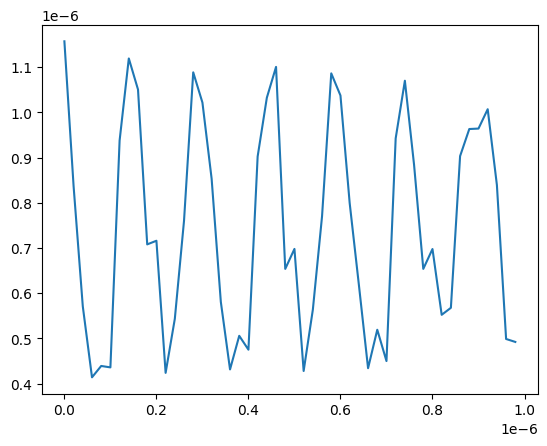

In [3]:
dados = np.load('T2_2QTII__2024_10_04__22_24_04.npz')
dados["header"]
Delay = dados['Delay']
Mag = dados['Mag']
Mag = 10**(Mag/20)
Phase = dados['Phase']
plt.plot(Delay,Mag)
#plt.vlines(0.525e-6,-110,-130)
print('T2_3QTII__2024_08_30__16_30_50.npz')
len(Delay)

[4.4580e+09 4.4585e+09]
4456500000.0


-3500000.0

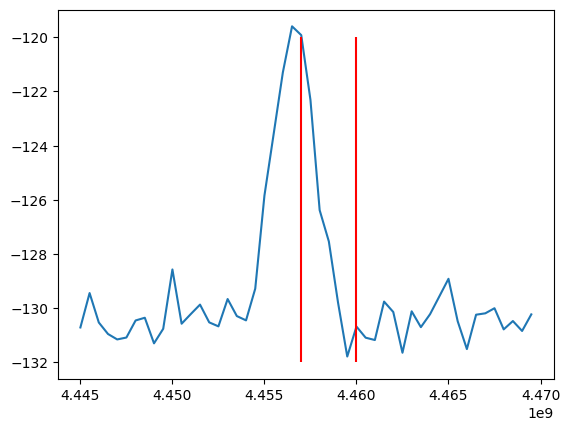

In [4]:
dados = np.load('TWOTONE_2QTII_ExctQubit_2024_10_04__22_04_56.npz')
dados["header"]
Freq = dados['Freq']
Mag = dados['Mag']
#Mag = 10**(Mag/20)
Phase = dados['Phase']
plt.plot(Freq,Mag)
#plt.vlines(0.525e-6,-110,-130)
print(Freq[np.where((Mag>=-127.9) &(Mag <=-126.1))])
m=Freq[np.argmax(Mag)]
print(m)
plt.vlines([4.4545e9+0.5e6*5,4.460e9],-132,-120,color="red")
4.453e9-m


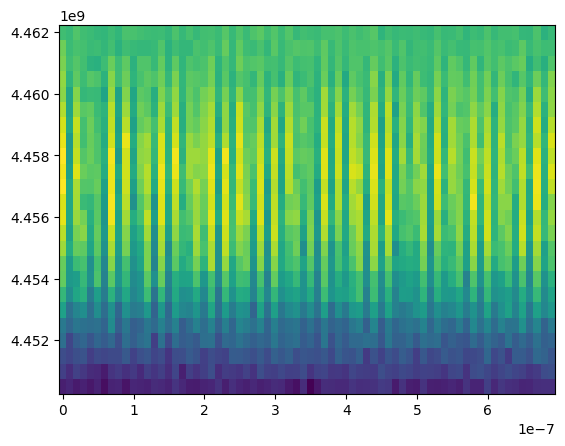

In [5]:
a=np.load("ChevronRamsey_2QTII__2024_10_05__00_37_09.npz")
plt.pcolor(a["Delay"],a["Freq"],a["Mag"])

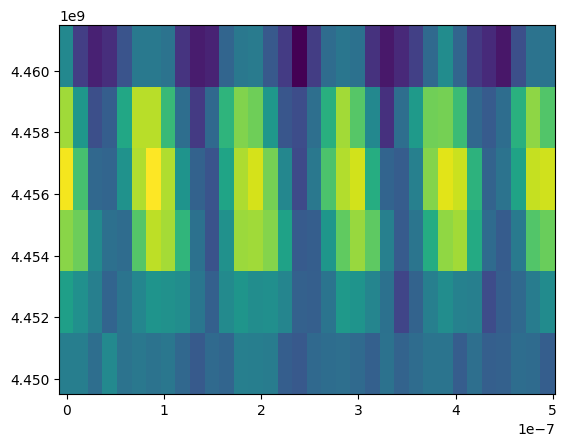

In [6]:
a=np.load("ChevronRamsey_2QTII__2024_10_05__11_47_20.npz")
plt.pcolor(a["Delay"],a["Freq"],a["Mag"])

In [7]:
print(a["Freq"])

plt.plot(a["Delay"],a["Mag"][14,:])

[4.4505e+09 4.4525e+09 4.4545e+09 4.4565e+09 4.4585e+09 4.4605e+09]


IndexError: index 14 is out of bounds for axis 0 with size 6

7020500000.000012

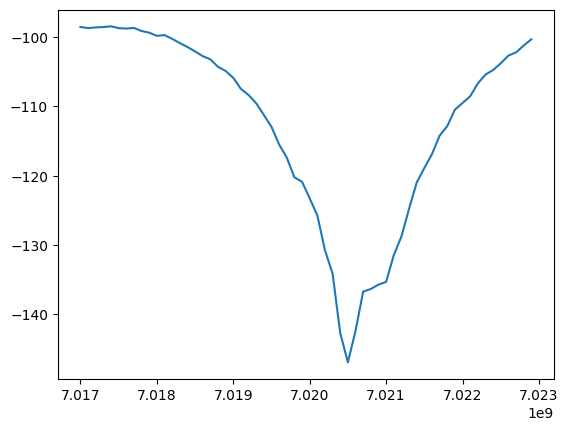

In [110]:
dados = np.load('Cavidade_Pulsado_Q2TII_2024_10_05__16_51_05.npz')
dados["header"]
Freq = dados['Freq']
Mag = dados['Mag']
#Mag = 10**(Mag/20)
Phase = dados['Phase']
plt.plot(Freq,Mag)
Freq[np.argmin(Mag)]

In [111]:
metadata={"att":50,
        "Fcavidade":7e9,
          }


AttributeError: 'dict' object has no attribute 'att'

[-1.45540731e+02 -3.92506089e+00 -1.45125500e+03  1.44809008e-08
  1.51015089e+02]


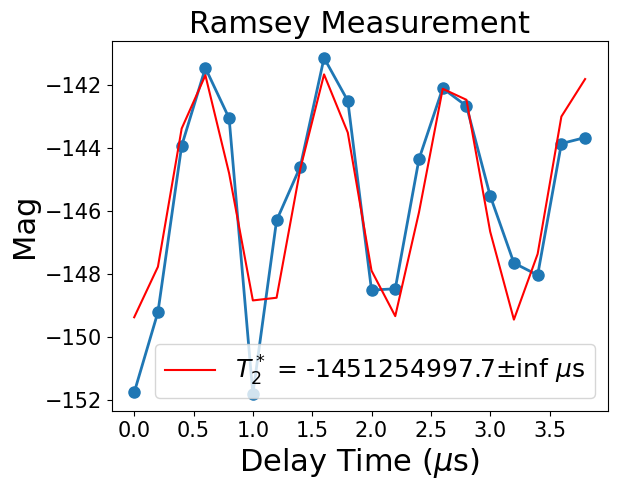

In [21]:
dados = np.load('RABI_2QTII_ExctQubit_2024_10_05__18_04_34.npz')
dados["header"]
Durat = dados['Durat']
#freq=dados["Freq"]
Mag = dados['Mag']
#(time, Const, Slope,Tr,period,Phase):
_,_,popt=Plot_Ramsey(Durat,Mag,[2e-7,3e-7,4e-6,1.4e-6,0])
print(popt)


In [15]:
from scipy.optimize import curve_fit
import math
import sys

def clear_output(wait=False):
    """Clear the output of the current cell receiving output.

    Parameters
    ----------
    wait : bool [default: false]
        Wait to clear the output until new output is available to replace it."""
    from IPython.core.interactiveshell import InteractiveShell
    if InteractiveShell.initialized():
        InteractiveShell.instance().display_pub.clear_output(wait)
    else:
        print('\033[2K\r', end='')
        sys.stdout.flush()
        print('\033[2K\r', end='')
        sys.stderr.flush()

def arredonda(numero):
    if numero == 0:
        return 0, 0
    
    # Encontra o expoente do primeiro algarismo significativo
    expoente = -int(math.floor(math.log10(abs(numero))))
    
    # Arredonda o número para o primeiro algarismo significativo
    numero_arredondado = round(numero, expoente)
    
    # Converte o número arredondado para string
    numero_str = str(numero_arredondado)
    
    # Encontra a posição da vírgula
    pos_virgula = numero_str.find('.')
    
    # Determina o número de casas decimais após a vírgula
    casas_decimais = len(numero_str) - pos_virgula - 1 if pos_virgula != -1 else 0
    
    # Corrige o número de casas decimais se o número arredondado for inteiro
    if pos_virgula == -1:
        casas_decimais = 0
    
    return numero_arredondado, max(casas_decimais, 0)


def Ramsey_g(time, Const, Slope,Tr,freq,Phase):
#     Const,Const1, Slope,Tr,freq,Phase = args
    """
    T2 curve using gaussian decay: (Const + Slope*exp(-0.5*((time-Const1)/Tr)**2)*cos( (2*pi*time/freq) + Phase))
    """
    
    return  (Const + Slope*np.exp(-0.5*(time/Tr)**2)*np.cos( (2*np.pi*time/freq) + Phase))

def Ramsey_e(time, Const, Slope,Tr,period,Phase):
    
#     Const, Const1, Slope, Tr, freq, Phase = args
    """
    T2 curve using exponential decay: (Const + Slope*exp(-0.5*((time-Const1)/Tr)**2)*cos( (2*pi*time/freq) + Phase))
    """
    return (Const + Slope*np.exp(-time/Tr)*np.cos( (2*np.pi*time/period) + Phase))



def Plot_Ramsey(time,data, argsinic):
    args = argsinic
    popt, pcov = curve_fit(Ramsey_e, time, data, p0=args,maxfev=10000,ftol=1e-15 )   
    T2 = round(popt[2]*1e6,1)
    perr = np.sqrt(np.diag(pcov))
    desvT2 = round(perr[2]*1e6,1)
    
    plt.plot(time*1e6,data,'-o',linewidth=2,markersize=8)
    plt.plot(time*1e6,Ramsey_e(time,*popt) ,c='r', label = f"$T_2^*$ = {T2}$\pm${desvT2} $\mu$s")
    plt.xlabel("Delay Time ($\mu$s)", fontsize=22)
    plt.xticks(fontsize = 15)
    plt.ylabel("Mag", fontsize=22)
    plt.yticks(fontsize = 15)
    plt.legend(prop={"size":18})
    plt.title("Ramsey Measurement", fontsize=22)
    
    return T2, desvT2, popt